In [1]:
import torch
import torch.nn.functional as f
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [4]:
import pandas as pd

df = pd.read_csv("datasets/train.tsv", sep='\t')
data = df.iloc[:, 1].tolist() 

In [5]:
data[:10]

['9 : 30 am ko Sunday Brunch ke liye ek naya weekly reminder add karen',
 'danny ko message karo aur dekho ke he wants to go to comic con',
 'do ghante ke liye alarm set kardo',
 'neil ke liye cake bake karne ke reminder ko mita den',
 'Please mere chat requests ko retrieve kare',
 'agar mai raat 9 baje tak idhar se nikal jau toh kya mai raat 11 baje tak Taipei pahunch jaunga ?',
 'Pensacola me is weekend ko free me karne ke liye cheeze',
 'Kya aaj thand hone wali hai',
 "Chris ko text karo ki I ' m stuck in traffic",
 'please 50 minutes ke liye timer ko set karen']

In [6]:
clean = sorted(set(''.join(data)))
# create a mapping from characters to integers
stoi = {s:i for i,s in enumerate(clean)}
itos = {i:s for i,s in enumerate(clean)}
vocab_size = len(clean)

In [7]:
vocab_size

76

In [8]:
corpus = open("datasets/names.txt").read().splitlines()

In [12]:
clean_hin_dataset = open("datasets/cleaned_hinenglish.txt").read().splitlines()

In [13]:
clean_hin_dataset[1:]

['danny ko message karo aur dekho ke he wants to go to comic con',
 'do ghante ke liye alarm set kardo',
 'neil ke liye cake bake karne ke reminder ko mita den',
 'please mere chat requests ko retrieve kare',
 'agar mai raat  baje tak idhar se nikal jau toh kya mai raat  baje tak taipei pahunch jaunga ',
 'pensacola me is weekend ko free me karne ke liye cheeze',
 'kya aaj thand hone wali hai',
 'chris ko text karo ki i  m stuck in traffic',
 'please  minutes ke liye timer ko set karen',
 ' pm ke alarm ko delete karo',
 'please subah  baje se pehle ke sabhi chore reminders ko hataye',
 'agle hafte san francisco me temperature c me',
 '   ke liye alarm ko cancel karen',
 'just the way you are song ko dohrayen',
 'bhaari traffic me mujhe waha pahunchne me kitna samay lagega',
 ' ke songs ki ek playlist create karo',
 'baltimore me mausam kaisa hai',
 'magic  point  bajaana shuru karo',
 'showtime par outlander schedule',
 'aaj humid kitna hai',
 'har monday  am and  pm ke liye alarm crea

In [15]:
#building the mappings like tokeniser
clean = sorted(set(''.join(clean_hin_dataset)))
stoi = {s:i for i,s in enumerate(clean)}
stoi['.'] = 27
itos = {i:s for s,i in stoi.items()}

In [16]:
itos

{0: ' ',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 27: '.'}

In [17]:
#build the dataset 
block_size = 3
def build_dataset(clean_hin_dataset):
        X,Y = [], []
        context = [27] * block_size
        for word in clean_hin_dataset:
            word = list(word) + ['.']
            for ch1 in word:
                current = stoi[ch1]
                Y.append(current)
                X.append(context)
                #print(''.join(itos[i] for i in context), '--->', itos[current])
                context = context[1:] + [current]
        X = torch.tensor(X)
        Y = torch.tensor(Y)
        return X,Y

import random
random.seed(32)
random.shuffle(clean_hin_dataset)
n1 = int(0.8 * len(clean_hin_dataset))
n2 = int(0.9 * len(clean_hin_dataset))
Xtrain, Ytrain = build_dataset(clean_hin_dataset[:n1])
Xval, Yval = build_dataset(clean_hin_dataset[n1:n2])
Xtest, Ytest = build_dataset(clean_hin_dataset[n2:])

In [18]:
data = build_dataset(clean_hin_dataset)

In [19]:
block_size = 3
embedding_size = 8
batch_size = 32
vocab_size = 28  # 27 characters + 1 for the end of word token
fan_in = embedding_size * block_size            #input to the network
g = torch.Generator().manual_seed(2347243647)
C = torch.randn((vocab_size,embedding_size),generator=g)
w1 = torch.randn((fan_in, 200),generator=g) * 0.01
b1 = torch.randn((200),generator=g) * 0
w2 = torch.randn((200, vocab_size),generator=g) * 0.01
b2 = torch.randn((vocab_size),generator=g) * 0
parameters = [C, w1, b1, w2, b2]

In [20]:
Xtrain.shape, Ytrain.shape

(torch.Size([105312, 3]), torch.Size([105312]))

In [21]:
C[Xtrain].view(-1, 24).shape

torch.Size([105312, 24])

In [22]:
w2.shape, b2.shape

(torch.Size([200, 28]), torch.Size([28]))

In [23]:
parameters

[tensor([[ 3.1975e-01, -1.7698e+00,  5.6239e-01, -8.6679e-01, -4.3770e-01,
           1.3029e-02, -1.1997e+00,  4.3132e-01],
         [-6.7537e-01, -3.6092e-01,  7.1400e-01,  6.2697e-01,  5.9734e-01,
           7.4360e-01, -1.1535e+00, -6.1650e-01],
         [ 3.4572e-01, -2.0373e+00, -3.9968e-01, -4.2878e-01,  9.1534e-01,
           6.3320e-01, -8.1671e-01, -1.1213e+00],
         [ 1.2985e+00, -1.4582e+00,  2.1274e+00, -5.0126e-03, -4.5355e-01,
           3.2746e-01, -4.1217e-01, -6.2477e-01],
         [-1.0280e+00,  2.9939e-01,  6.3428e-01, -4.8539e-01,  2.1606e-01,
          -6.7049e-01, -9.7874e-01, -8.9481e-01],
         [-4.2211e-01,  1.4611e+00,  5.6559e-01, -3.6837e-01, -1.7657e+00,
           3.4693e-01,  4.1552e-01,  2.0526e-02],
         [ 4.6791e-01, -1.5856e+00, -1.1492e+00, -2.8799e-01, -7.5883e-01,
          -1.4490e+00, -3.9736e-01, -1.0284e+00],
         [-1.6679e-01,  1.2104e-01,  8.7576e-01, -5.0630e-01,  2.0467e+00,
          -9.5814e-01,  1.3495e+00,  1.5165e-01],


In [121]:
counts = logits.exp()      #logits increase to make counts
prob = counts / counts.sum(-1, keepdims=True) #counts normalized
manual_loss = -prob[torch.arange(413),Y].log().mean() #model product for all correct prob.trans

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [413], [228146]

In [24]:
count = 0
for p in parameters:
    count += p.nelement()
count

10852

In [25]:
for p in parameters:
    p.requires_grad = True

In [26]:
steps, lossi = [],[]

In [ ]:
#implmenting a basic RNN
block_size = 3
embedding_size = 8
batch_size = 32
hidden_size = 200
vocab_size = 28  # 27 characters + 1 for the end of word token
hprev = torch.zeros((batch_size, hidden_size))

for _ in range(10):
    idx = torch.randint(0, Xtrain.shape[0], (batch_size,))


    emb = C[Xtrain[idx]]  # (batch_size, block_size, embedding_size)
    emb_exp = emb.view(-1, fan_in)  # Current Input  (32, 24)
    input = emb_exp @ hprev
    hpreact = input @ w1 + b1  # (32, 200)
    hprev = input @ w1 + b1 
    h = torch.tanh(hpreact)
    logits = h @ w2 + b2
    loss = f.cross_entropy(logits,Ytrain[idx])

print(loss.item())


NameError: name 'hidden_size' is not defined

In [45]:
for i in range(40000):

  #generate a batch
  idx = torch.randint(0, Xtrain.shape[0], (batch_size,))
  
  #forward pass
  emb = C[Xtrain[idx]]
  hpreact = emb.view(-1,fan_in) @ w1 + b1
  h = torch.tanh(hpreact)
  logits = h @ w2 + b2
  step_loss = f.cross_entropy(logits,Ytrain[idx])

  #backward pass
  for p in parameters:
    p.grad = None
  step_loss.backward()

  #update
  #lr = 0.1 if i < 10000 else 0.01
  lr = 0.001
  steps.append(i)
  lossi.append(step_loss.item())
  for p in parameters:
    p.data += -lr * p.grad
print(step_loss.item())

2.3292336463928223


In [46]:
#loss for val set
with torch.no_grad():
    emb = C[Xval]
    hpreact = emb.view(-1,fan_in) @ w1 + b1
    h = torch.tanh(hpreact)
    logits = h @ w2 + b2
    val_loss = f.cross_entropy(logits,Yval)
print(val_loss.item())

2.1737072467803955


In [47]:
#loss for test set
with torch.no_grad():
    emb = C[Xtest]
    hpreact = emb.view(-1,fan_in) @ w1 + b1
    h = torch.tanh(hpreact)
    logits = h @ w2 + b2
    test_loss = f.cross_entropy(logits,Ytest)
print(test_loss.item())

2.1909244060516357


In [40]:
lossi[-10:]

[2.0939135551452637,
 2.219836950302124,
 2.345792293548584,
 2.4501912593841553,
 2.1821229457855225,
 2.5865371227264404,
 2.2546980381011963,
 2.354661703109741,
 2.3747825622558594,
 2.262026309967041]

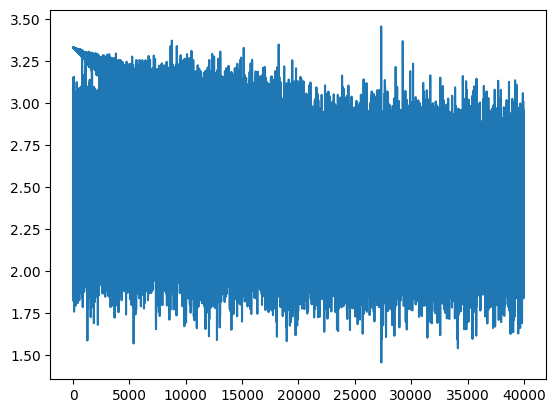

In [41]:
plt.plot(steps, lossi)

In [48]:
# sample from the model
g = torch.Generator().manual_seed(2147447)

for _ in range(10):
    out = []
    context = [27] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = f.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 27:
        break

    print(''.join(itos[i] for i in out))

ka rense cubheyaye.
mujaye ke che merye kyad cmaje.
ke mes ha yime kya tigaye lond kar ke parli hondars.
malhi fit ptome marhoa y he tite karina sdayifajhes merrek mujhei.
kla.
pliy aimenusfadar ti mopnhe.
ka tiyorzno rce kurr ka liye hajaiti med .
bajmturhahura talarsaaika bajarm se cak aabko mides karo.
pkae went pai.
hai mutdalant kabfis ko cesm  iint ke aa jice ke nek ay taisunhujh kaisagahoe larayerc ker para weru bakt pvit kanoso.


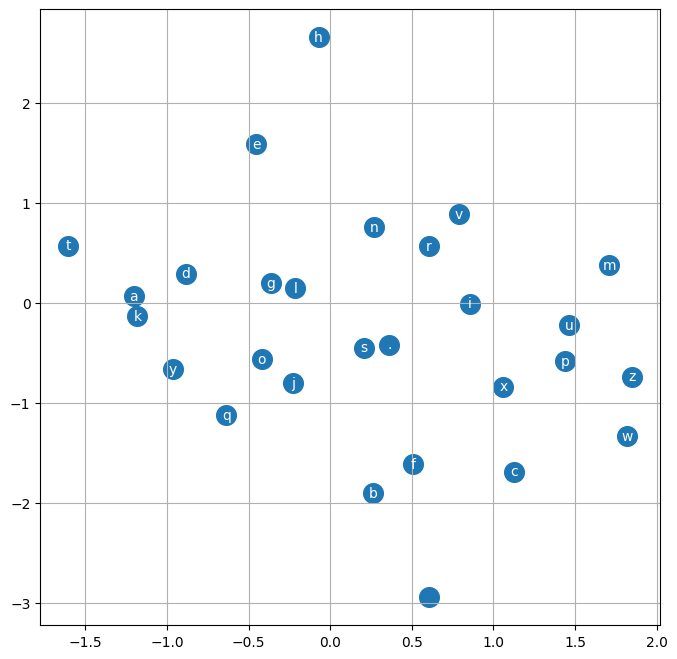

In [49]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')